In [73]:
%load_ext autoreload
%autoreload 2
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from domino.evaluate import score_sdms, run_sdms, run_sdm, score_sdm_explanations, run_sdm_explanations
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
score_sdms.inp(94854)

{'setting_dp': Artifact(id=657722, run_id=90506, type=<class 'meerkat.datapanel.DataPanel'>),
 'spec_columns': ['emb_group', 'alpha', 'sdm_class']}

In [81]:
run_id = 71729
out = run_sdm_explanations(
    setting_dp=run_sdms.out(run_id).load(), 
    xmodal_emb_dp=run_sdms.inp(run_id)["xmodal_emb_dp"].load(),  
    word_dp=run_sdms.inp(run_id)["word_dp"].load(),
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
 41%|█████████████████████████████████████████████████████████████                                                                                        | 95/232 [05:38<06:36,  2.90s/it]/home/sabri/code/domino/domino/sdm/abstract.py:48: RuntimeWarning: invalid value encountered in true_divide
  np.dot(data_dp["pred_slices"].T, data_dp[self.config.xmodal_emb])
 42%|██████████████████████████████████████████████████████████████▉                                                                                      | 98/232 [05:48<07:30,  3.36s/it]/home/sabri/code/domino/domino/sdm/abstract.py:48: RuntimeWarning: invalid value encountered in true_divide
  np.dot(data_dp["pred_slices"].T, data_dp[self.config.xmodal_emb])
 46%|███████████████████████████████████████████████████████████████████▌                                                                                | 106/232 

In [53]:
out = score_sdm_explanations(setting_dp=run_sdms.out(71729), skip_terra_cache=True)

task: score_sdm_explanations, run_id=122560


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3480/3480 [03:15<00:00, 17.80it/s]


/home/sabri/code/domino/domino/plot.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)


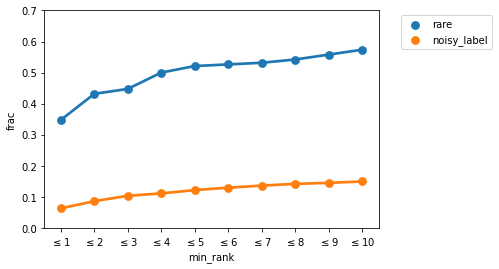

In [56]:
from domino.plot import expl_plot
expl_plot([121148, 122560])

In [33]:
from domino.plot import generate_expl_group_df
df = generate_expl_group_df(121148, metric="max_reciprocal_rank")

/home/sabri/code/domino/domino/plot.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)


In [21]:
hist = np.histogram(df["min_rank"], bins=[1, 2,3,4,5,6,7,8,9,10,11, df["min_rank"].max()])

Text(0.5, 0, 'Minimum Rank of Slice Synonym')

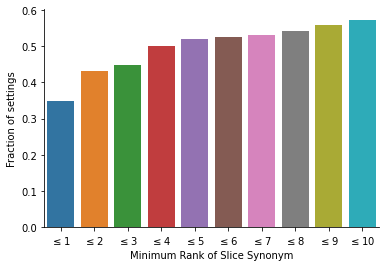

In [22]:

sns.barplot(x=[fr"$\leq{x}$" for x in hist[1][:-2]], y=np.cumsum(hist[0][:-1]) /len(df))
sns.despine()
plt.ylabel("Fraction of settings")
plt.xlabel("Minimum Rank of Slice Synonym")

In [40]:
rows = []
for emb_group in df["emb_group"].unique():
    curr_df = df[df["emb_group"] == emb_group]
    hist = np.histogram(curr_df["min_rank"], bins=[1, 2,3,4,5,6,7,8,9,10,11, curr_df["min_rank"].max()])
    fracs = np.cumsum(hist[0][:-1]) /len(curr_df)
    bins = hist[1][:-2]
    rows.extend([
        {"frac": frac, "bin": bin_end, "emb_group": emb_group} for frac, bin_end in zip(fracs, bins)
    ])
plot_df = pd.DataFrame(rows)

<AxesSubplot:xlabel='bin', ylabel='frac'>

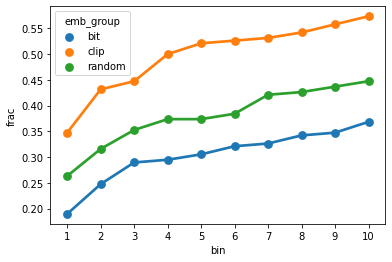

In [41]:
sns.pointplot(data=plot_df, x="bin", y="frac", hue="emb_group")

In [27]:
hist

(array([66, 16,  3, 10,  4,  1,  1,  2,  3,  3, 81]),
 array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
        9699]))

In [42]:
df

,run_sdm_run_id,pred_slice_idx,slice_idx,slice_name,slice_synset,mean_reciprocal_rank,max_reciprocal_rank,mean_rank,min_rank,min_rank_lemma,target_name,index,emb_group,alpha,sdm_class,slice_category
7766,81434,3,0,accessory.n.01,accessory.n.01,0.018868,0.018868,53.0,53,accessory,clothing.n.01,3863,bit,0.03,domino.sdm.gmm.MixtureModelSDM,rare
7782,81439,1,0,accessory.n.01,accessory.n.01,0.111111,0.111111,9.0,9,accessory,clothing.n.01,3866,clip,0.03,domino.sdm.gmm.MixtureModelSDM,rare
7684,81368,2,0,accessory.n.01,accessory.n.01,0.000374,0.000374,2672.0,2672,accessory,clothing.n.01,3842,random,0.03,domino.sdm.gmm.MixtureModelSDM,rare
12086,81692,3,0,accordion.n.01,accordion.n.01,1.000000,1.000000,1.0,1,accordion,musical_instrument.n.01,6023,bit,0.03,domino.sdm.gmm.MixtureModelSDM,rare
12040,81619,0,0,accordion.n.01,accordion.n.01,1.000000,1.000000,1.0,1,accordion,musical_instrument.n.01,6010,clip,0.03,domino.sdm.gmm.MixtureModelSDM,rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13242,81648,1,0,woodwind.n.01,woodwind.n.01,0.000204,0.000204,4900.0,4900,wood,musical_instrument.n.01,6611,clip,0.03,domino.sdm.gmm.MixtureModelSDM,rare
13262,81721,1,0,woodwind.n.01,woodwind.n.01,0.000136,0.000136,7334.0,7334,wood,musical_instrument.n.01,6616,random,0.03,domino.sdm.gmm.MixtureModelSDM,rare
1948,81093,4,0,wreck.n.04,wreck.n.04,0.500000,0.500000,2.0,2,wreck,vehicle.n.01,969,bit,0.03,domino.sdm.gmm.MixtureModelSDM,rare
2026,81226,3,0,wreck.n.04,wreck.n.04,0.500000,0.500000,2.0,2,wreck,vehicle.n.01,988,clip,0.03,domino.sdm.gmm.MixtureModelSDM,rare
